SnapTravel Data Challenge
========

#### Questions:

1. What types of itineraries are popular? Within our popular itineraries, what key trends are you seeing?

2. Our goal for spending money is to maximize the amount of clicks while minimizing the amount of spend. With this in mind, where should we increase spend? Where should we decrease spend? 

3. What’s an interesting insight from the data that you’d like to dive deeper on? 

#### I decided to approach these questions in Jupyter Notebooks using Python, so you can follow along on my process!
#### I will be answering the questions as the answers become unravelled in the data shown below. 

Imports
----

In [1]:
import pandas as pd
import matplotlib
import numpy as np

Import CSVs
-----

In [2]:
case_bookings_df = pd.read_csv('data_analyst_case_bookings (1).csv')
case_spend_df = pd.read_csv('data_analyst_case_spend (2).csv')

Bookings Analysis
--------

#### Here is the bookings csv, as a pandas dataframe.

In [3]:
case_bookings_df

,DATE,HOTEL_ID,COUNTRY,HOTEL_STARS,ROOM_PRICE,ROOM_COST,LOS,DTA,BOOKING_DOW,CHECK_IN_DOW
0,2019-05-19,107580.0,US,3,115.89,104.07,1,0,Mon,Mon
1,2019-05-31,114266.0,US,3,96.33,88.03,1,0,Fri,Fri
2,2019-05-18,114266.0,US,3,112.04,101.76,1,0,Sat,Sat
3,2019-05-18,114266.0,US,3,111.18,101.00,1,1,Sat,Sun
4,2019-05-21,699378.0,US,3,110.02,100.00,1,0,Tue,Tue
...,...,...,...,...,...,...,...,...,...,...
16422,2019-05-29,153525.0,US,2,66.57,62.00,1,2,Wed,Fri
16423,2019-05-29,153525.0,US,2,71.54,66.35,1,0,Wed,Wed
16424,2019-05-28,153525.0,US,2,71.54,66.35,1,0,Tue,Tue
16425,2019-05-13,153525.0,US,2,78.90,74.35,1,5,Mon,Sat


### Let's start by investigating some basic popularity statistics. 

In [4]:
case_bookings_df["HOTEL_ID"].value_counts()

135545.0    86
106789.0    83
112918.0    74
122215.0    71
118586.0    69
            ..
124836.0     1
109420.0     1
114633.0     1
135928.0     1
120839.0     1
Name: HOTEL_ID, Length: 8101, dtype: int64

#### Insight: Hotel 135545 is the most popular. 
It would be interesting to see if there is a specific chain of hotels that is most popular. 

In [5]:
case_bookings_df["COUNTRY"].value_counts().head()

US    16004
MX      111
CA       85
CO       21
IT       17
Name: COUNTRY, dtype: int64

#### Insight: The US is by far the most popular place to stay. 
It would be interesting to know which states are most popular as well, since the US is so large.

In [6]:
case_bookings_df["HOTEL_STARS"].value_counts()

2    7329
3    6254
4    2338
1     270
5     236
Name: HOTEL_STARS, dtype: int64

#### Insight: Most people are booking 2-star hotels, followed closely by 3-star hotels. 

In [7]:
case_bookings_df["ROOM_PRICE"].mean()

163.63771839045475

In [8]:
case_bookings_df["ROOM_PRICE"].median()

120.98

In [9]:
case_bookings_df["ROOM_COST"].mean()

144.96978737870577

In [10]:
case_bookings_df["ROOM_COST"].median()

108.23

#### Insight: The most popular price range is 100-200 dollars.

In [11]:
case_bookings_df["LOS"].value_counts()

1     13027
2      2395
3       686
4       194
5        76
6        25
7        18
8         4
10        1
9         1
Name: LOS, dtype: int64

#### Insight: The most common length of stay is simply 1 day, by far.

In [12]:
case_bookings_df["DTA"].value_counts()

0      9632
1      1550
2       765
3       550
4       364
       ... 
177       1
94        1
245       1
371       1
191       1
Name: DTA, Length: 123, dtype: int64

#### Insight: Most people book same-day check-ins.

#### Let's find out what the most popular check-in days of week are. 

In [13]:
days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

Text(0, 0.5, 'Popularity (Number of checkins)')

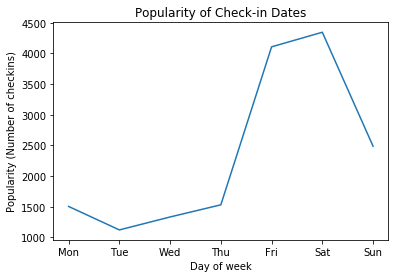

In [14]:
# Find number of checkins per day of week
check_in_dow = case_bookings_df["CHECK_IN_DOW"].value_counts().reindex(days_of_week)

# Plot number of checkins per day of week
ax = check_in_dow.plot(title='Popularity of Check-in Dates')
ax.set_xlabel("Day of week")
ax.set_ylabel("Popularity (Number of checkins)")

#### Therefore, the most popular check in day of week is Saturday, followed closely by Friday. 

Text(0, 0.5, 'Popularity (Number of bookings)')

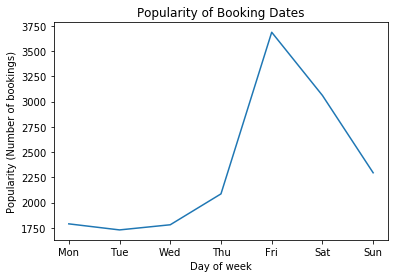

In [15]:
# Find number of bookings per day of week
booking_dow = case_bookings_df["BOOKING_DOW"].value_counts().reindex(days_of_week)

# Plot number of bookings per day of week
ax = booking_dow.plot(title='Popularity of Booking Dates')
ax.set_xlabel("Day of week")
ax.set_ylabel("Popularity (Number of bookings)")

#### Also interesting to note, most bookings are made on Friday. 

#### Therefore, perhaps it would be advantageous to peak advertisements around or just before Friday, as people would see the advertisement and be inclined to click and book same-day check-ins.

Answer to Question 1
======

In summary, to answer Question 1, the most popular itinerary consists of a Friday booking and Saturday check-in to a 2-star, 100-200 dollar range hotel in the US.

Spend Analysis
------

In [16]:
# Let's order the dataframe by the highest number of clicks. 
case_spend_df[case_spend_df["CLICKS"] > 0].sort_values("CLICKS", ascending=False)

,DATE,HOTEL_ID,DTA,LOS,CHECK_IN_DOW,BOOKING_DOW,ELIGIBLE_IMPRESSIONS,IMPRESSIONS,CLICKS,SPEND
1392248,2019-05-25,252954,0,1,Sat,Sat,85,85,38,6.884154
3744635,2019-05-24,229555,1,2,Sat,Fri,128,128,29,10.791499
1367966,2019-05-25,118586,0,2,Sat,Sat,47,47,25,9.526714
1384021,2019-05-25,1041711,0,1,Sat,Sat,143,143,25,5.442427
3469759,2019-05-18,241363,0,1,Sat,Sat,95,95,21,2.275130
...,...,...,...,...,...,...,...,...,...,...
1395563,2019-05-25,209623,0,1,Sat,Sat,3,3,1,0.043052
1395562,2019-05-25,688137,26,1,Thu,Sat,7,1,1,0.147200
1395544,2019-05-25,125683,1,1,Sun,Sat,3,1,1,0.220546
1395477,2019-05-25,188823,0,1,Sat,Sat,9,9,1,0.110993


In [17]:
# And here is the dataframe ordered by highest spend. 
case_spend_df[case_spend_df["CLICKS"] > 0].sort_values("SPEND", ascending=False)

,DATE,HOTEL_ID,DTA,LOS,CHECK_IN_DOW,BOOKING_DOW,ELIGIBLE_IMPRESSIONS,IMPRESSIONS,CLICKS,SPEND
1984612,2019-05-24,257547,1,1,Sat,Fri,17,17,9,14.011718
565673,2019-05-17,109284,0,1,Fri,Fri,103,103,15,12.086967
3744635,2019-05-24,229555,1,2,Sat,Fri,128,128,29,10.791499
835126,2019-05-11,200083,0,1,Sat,Sat,48,48,9,9.979918
1367966,2019-05-25,118586,0,2,Sat,Sat,47,47,25,9.526714
...,...,...,...,...,...,...,...,...,...,...
2083932,2019-05-26,357282,2,1,Tue,Sun,7,2,1,0.029541
1524060,2019-05-30,209715,0,1,Thu,Thu,3,3,1,0.028337
2488009,2019-05-27,201180,0,1,Mon,Mon,12,7,1,0.028220
1734515,2019-05-14,193219,12,1,Sun,Tue,6,6,1,0.028219


### Let's have a look at some basic relations.

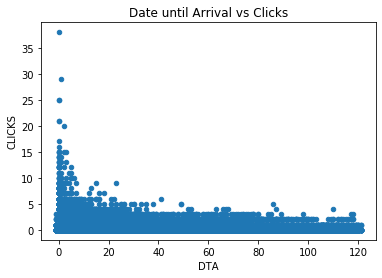

In [30]:
# This is a plot of Date until Arrival vs CLICKS
case_spend_df.plot.scatter(x='DTA', y='CLICKS', title='Date until Arrival vs Clicks')

#### It appears that the less date until arrival gains more clicks on average.

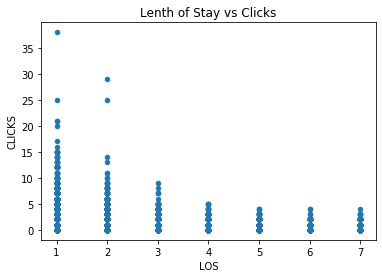

In [31]:
# This is a plot of Length of Stay vs CLICKS
case_spend_df.plot.scatter(x='LOS', y='CLICKS', title='Lenth of Stay vs Clicks')

#### It also appears that shorter length of stay advertised will gain more clicks, on average.

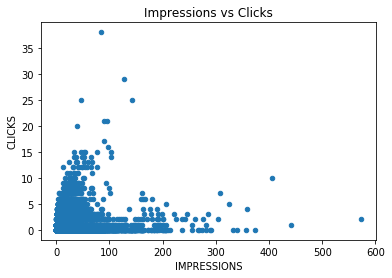

In [24]:
# This is a plot of IMPRESSIONS vs CLICKS
case_spend_df.plot.scatter(x='IMPRESSIONS', y='CLICKS', title='Impressions vs Clicks')

#### Interestingly, there is not necessarily a correlation between number of impressions and number of clicks. 
#### Therefore, pooling money into impressions will not necessarily yield an increase in clicks. 

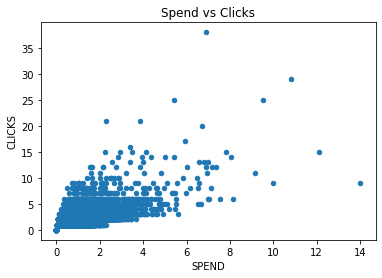

In [18]:
# This is a plot of SPEND vs CLICKS
case_spend_df.plot.scatter(x='SPEND', y='CLICKS', title='Spend vs Clicks')

#### As you can see, there is not necessarily a correlation with more spend equalling more clicks. 
#### Therefore, it would be unwise to blindly input money without strategy, expecting an output of more clicks. 

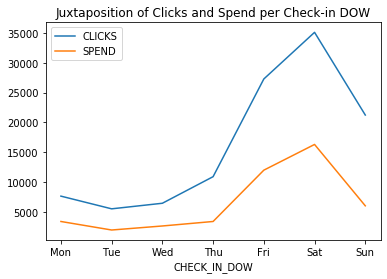

In [19]:
# Create dataframe of clicks and spend per check-in day of week, summed
check_in_dow_clicks_and_spend_sum = case_spend_df[case_spend_df["CLICKS"] > 0].groupby(['CHECK_IN_DOW']).sum()[["CLICKS", "SPEND"]].reindex(days_of_week)
check_in_dow_clicks_and_spend_sum.plot(title='Juxtaposition of Clicks and Spend per Check-in DOW')

#### At first glance from this plot, it may seem like the more dollars pooled into Saturday ads, the more clicks will be received. 
#### However, is this necessarily true?
#### Let's have a look at how much clicks we get per dollar spent per each  day. 

Text(0, 0.5, 'Number of clicks per spend')

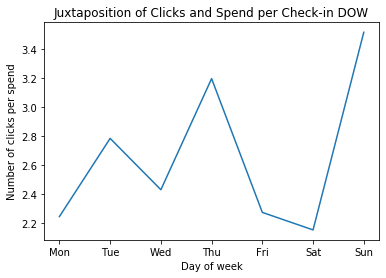

In [20]:
# Get the number of clicks per spend as per check-in dates
checkin_clicks_per_spend = check_in_dow_clicks_and_spend_sum["CLICKS"]/check_in_dow_clicks_and_spend_sum["SPEND"]

# Plot number of clicks per spend as per check-in dates
ax = checkin_clicks_per_spend.plot(title='Juxtaposition of Clicks and Spend per Check-in DOW')
ax.set_xlabel("Day of week")
ax.set_ylabel("Number of clicks per spend")

#### Here, you can see that Saturday actually receives the LEAST clicks per dollar spent. 
#### Therefore, it may be unwise to blindly pool money into Saturday for optimal clicks. 
#### The same pattern is seen when looking at booking dates below.

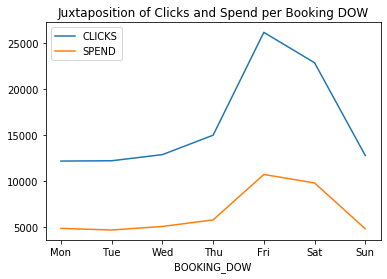

In [21]:
# Create dataframe of clicks and spend per booking day of week, summed
booking_dow_clicks_and_spend_sum = case_spend_df[case_spend_df["CLICKS"] > 0].groupby(['BOOKING_DOW']).sum()[["CLICKS", "SPEND"]].reindex(days_of_week)
booking_dow_clicks_and_spend_sum.plot(title='Juxtaposition of Clicks and Spend per Booking DOW')

#### Again, here it seems like the more money pooled into Friday ads, the more clicks will be received. 
#### However, again, by looking at clicks per spend below, this is proven to be not necessarily true. 

Text(0, 0.5, 'Number of clicks per spend')

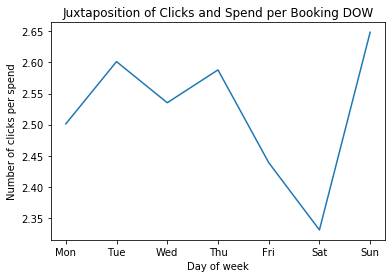

In [22]:
# Get the number of clicks per spend as per booking dates
booking_clicks_per_spend = booking_dow_clicks_and_spend_sum["CLICKS"]/booking_dow_clicks_and_spend_sum["SPEND"]

# Plot number of clicks per spend as per booking dates
ax = booking_clicks_per_spend.plot(title='Juxtaposition of Clicks and Spend per Booking DOW')
ax.set_xlabel("Day of week")
ax.set_ylabel("Number of clicks per spend")

#### Again, here, it is shown that Saturday has the lowest return on ad spend with respect to clicks/spend. 

Answer to Question 2
======

To maximize clicks, it would be best to advertise mostly short LOS (1-2 days) and short DTA (0-5 days). Therefore, increasing spending on ads like this one and decreasing spending elsewhere is advised. 

From looking at these graphs, it seems like the spend on Friday and Saturday is receiving the most clicks, however, Friday and Saturday have the lowest return on ad spend with respect to clicks/spend. Therefore, it would be advised to consider testing putting more money into other days such as Sunday, Tuesday, and Thursday, which have the highest return on ad spend, in an experiment. 

It could also be key to advertise the most popular itineraries (ie, the type of trip that satisfied Question 1). This way, people would immediately see what they want and be able to book in as little clicks as possible, thus optimising a positive user experience and enticing them further to (a) return to the site in the future, and (b) recommend the site to friends. 

Answer to Question 3
======

#### There are a few things that were NOT in the data that I would be interested to see:
- Are there certain hotel chains that are popular, not just individual hotels? This information could also be used in advertisements. 
- Which states are most popular to stay in?
- What is the citizenship of the user? (ie, are US citizens most likely to book in US, while other citizens are most likely to book in another location?) This information could be used to cater advertisements more to the user. 
- Likewise, which state does the user live in, if they live in the US? There may be some trends as to which states like to vacation in which other states. Of course, the data would have to be anonymized. 
- All of this data is from May 2019. I suspect that some interesting insights could be gained from looking at different months of the year in comparison with eachother. For example, the holiday season would likely have a spike in interest, so spend and clicks could be maximized there. Likewise, other seasons such as March Break or Black Friday or Valentine's Day may have spikes as well (given catered advertisements). 

#### Insights from the data that would be interesting to dive deeper on:
- Why does Saturday always have the poorest return on ad spend with respect to clicks/spend, even though Saturday spend always brings in the most clicks?
- Why is there not a trend with more impressions equalling more clicks?


### Thank you for allowing me to participate in this interesting data challenge, SnapTravel!

Sincerely,

Anonymous